In [2]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel

## Data Preprocessing

In [ ]:
df = pd.read_csv("training_data.csv")

In [ ]:
# split date into month, day, year
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

df = df.drop(columns=['NASDAQ-Vol.', 'DOW-Vol.', 'GOLD-Vol.', 'OIL-Vol.'])
df.replace(',', '', regex=True, inplace=True)

In [4]:
df = pd.read_csv("training_data_4.csv")

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df.replace(',', '', regex=True, inplace=True)

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
#df.to_csv("training_data_3.csv", index=False)

In [9]:
df.head()

,Date,BTC-Open,BTC-High,BTC-Low,BTC-Close,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,...,GOLD-Open,GOLD-High,GOLD-Low,OIL-Price,OIL-Open,OIL-High,OIL-Low,Month,Day,Year
0,2019-05-18,7341.664551,7447.271973,7251.504395,7271.208008,7271.208008,2.135429e+10,243.911301,246.362762,233.099854,...,1287.2,1289.0,1274.6,62.76,63.12,63.64,62.52,5,18,2019
1,2019-05-19,7267.962891,8261.941406,7267.962891,8197.689453,8197.689453,2.590242e+10,234.449463,263.740997,233.758667,...,1287.2,1289.0,1274.6,62.76,63.12,63.64,62.52,5,19,2019
2,2019-05-20,8196.923828,8200.967773,7678.781738,7978.309082,7978.309082,2.384340e+10,261.267487,261.551270,241.803650,...,1277.6,1278.8,1273.3,63.10,62.93,63.81,62.45,5,20,2019
3,2019-05-21,7977.969238,8062.167969,7843.339844,7963.327637,7963.327637,2.512725e+10,251.647842,262.107544,248.196304,...,1277.7,1277.7,1269.0,62.99,63.22,63.60,62.75,5,21,2019
4,2019-05-22,7956.291992,7997.612305,7615.987305,7680.066406,7680.066406,2.471947e+10,254.995316,258.801849,242.730484,...,1274.4,1277.1,1272.0,61.42,62.95,63.00,61.03,5,22,2019


In [10]:
df.shape

(1828, 44)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1828 non-null   datetime64[ns]
 1   BTC-Open        1828 non-null   float64       
 2   BTC-High        1828 non-null   float64       
 3   BTC-Low         1828 non-null   float64       
 4   BTC-Close       1828 non-null   float64       
 5   BTC-Adj Close   1828 non-null   float64       
 6   BTC-Volume      1828 non-null   float64       
 7   ETH-Open        1828 non-null   float64       
 8   ETH-High        1828 non-null   float64       
 9   ETH-Low         1828 non-null   float64       
 10  ETH-Close       1828 non-null   float64       
 11  ETH-Adj Close   1828 non-null   float64       
 12  ETH-Volume      1828 non-null   int64         
 13  DOGE-Open       1828 non-null   float64       
 14  DOGE-High       1828 non-null   float64       
 15  DOGE

In [12]:
print('Null Values:',df.isnull().values.sum())
print('NA values:',df.isnull().values.any())

Null Values: 0
NA values: False


In [13]:
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,Date,BTC-Open,BTC-High,BTC-Low,BTC-Close,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,...,GOLD-Open,GOLD-High,GOLD-Low,OIL-Price,OIL-Open,OIL-High,OIL-Low,Month,Day,Year


In [14]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2019-05-18 00:00:00
Ending Date 2024-05-18 00:00:00


## Random Forest Regressor

In [15]:
X = df.drop(columns=['Date','BTC-High', 'BTC-Low', 'BTC-Close'])
y = df[['BTC-High', 'BTC-Low', 'BTC-Close']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
X_train

,BTC-Open,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,ETH-Close,ETH-Adj Close,ETH-Volume,DOGE-Open,...,GOLD-Open,GOLD-High,GOLD-Low,OIL-Price,OIL-Open,OIL-High,OIL-Low,Month,Day,Year
73,9522.329102,9607.423828,1.382981e+10,211.339203,213.614075,206.867615,210.522598,210.522598,5489918859,0.002831,...,1439.5,1445.7,1434.8,58.05,57.07,58.47,56.96,7,30,2019
1663,44080.023440,43746.445310,2.990976e+10,2293.628174,2310.713135,2225.081055,2231.661377,2231.661377,12790612571,0.094248,...,2037.8,2053.4,2035.3,69.38,72.10,72.60,69.11,12,6,2023
69,9913.126953,9870.303711,1.449571e+10,219.628128,220.236389,214.125687,219.629608,219.629608,5729852178,0.002921,...,1414.9,1424.8,1412.9,56.20,55.93,56.57,55.68,7,26,2019
162,9241.707031,9551.714844,3.259313e+10,179.932632,188.155334,177.682358,184.242218,184.242218,10815941952,0.002621,...,1506.4,1520.9,1503.1,56.66,56.07,56.74,55.60,10,27,2019
526,13108.063480,13031.173830,2.440692e+10,412.457642,417.159210,405.350647,406.217773,406.217773,10890207469,0.002645,...,1906.5,1917.3,1895.2,39.85,40.61,40.92,39.57,10,25,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,20594.294920,20710.597660,2.897021e+10,1127.511841,1185.432495,1112.572632,1124.824585,1124.824585,15632089439,0.060175,...,1840.6,1848.4,1830.7,110.65,110.58,112.47,108.72,6,21,2022
1294,16968.683590,17088.660160,1.953971e+10,1276.328613,1294.303345,1269.243164,1294.303345,1294.303345,6213645709,0.101594,...,1817.0,1818.7,1791.8,80.30,81.32,82.19,79.68,12,2,2022
860,44894.300780,42839.750000,4.283935e+10,3154.562012,3159.644043,2747.337646,2931.669189,2931.669189,25595422789,0.224726,...,1743.7,1758.0,1740.2,73.98,73.24,74.27,72.81,9,24,2021
1459,27171.513670,27036.650390,1.273224e+10,1816.824219,1830.351563,1797.843750,1824.121460,1824.121460,5595959668,0.072049,...,2021.3,2022.7,1989.1,70.86,71.32,71.79,70.45,5,16,2023


### Baseline Model

In [18]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

train_pred = rf_regressor.predict(X_train)
test_pred = rf_regressor.predict(X_test)

In [19]:
train_mse_high = mean_squared_error(y_train['BTC-High'], train_pred[:, 0], squared=False)
train_mse_low = mean_squared_error(y_train['BTC-Low'], train_pred[:, 1], squared=False)
train_mse_close = mean_squared_error(y_train['BTC-Close'], train_pred[:, 2], squared=False)

test_mse_high = mean_squared_error(y_test['BTC-High'], test_pred[:, 0], squared=False)
test_mse_low = mean_squared_error(y_test['BTC-Low'], test_pred[:, 1], squared=False)
test_mse_close = mean_squared_error(y_test['BTC-Close'], test_pred[:, 2], squared=False)

In [20]:
print("MSE for High Price Prediction, Train: {:.4f}, Test: {:.4f}".format(train_mse_high, test_mse_high))
print("MSE for Low Price Prediction, Train: {:.4f}, Test: {:.4f}".format(train_mse_low, test_mse_low))
print("MSE for Closing Price Prediction, Train: {:.4f}, Test: {:.4f}".format(train_mse_close, test_mse_close))

MSE for High Price Prediction, Train: 196.4116, Test: 417.3533
MSE for Low Price Prediction, Train: 219.1545, Test: 648.7318
MSE for Closing Price Prediction, Train: 70.8111, Test: 234.7500


### Parameter Hypertuning

In [21]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END .max_depth=5, min_samples_split=2, n_e

[CV] END max_depth=15, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=15, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=15, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END max_depth=15, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END .max_depth=15, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END .max_depth=15, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END .max_depth=15, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END .max_depth=15, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END .max_depth=15, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=15, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END max_depth=15, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END max_depth=15, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END max_depth=15, min_s

In [22]:
best_params

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}

In [23]:
rf_regressor = best_rf_model
rf_regressor

RandomForestRegressor(max_depth=15, random_state=42)

In [24]:
train_pred = rf_regressor.predict(X_train)
test_pred = rf_regressor.predict(X_test)

In [25]:
train_mse_high = mean_squared_error(y_train['BTC-High'], train_pred[:, 0], squared=False)
train_mse_low = mean_squared_error(y_train['BTC-Low'], train_pred[:, 1], squared=False)
train_mse_close = mean_squared_error(y_train['BTC-Close'], train_pred[:, 2], squared=False)

test_mse_high = mean_squared_error(y_test['BTC-High'], test_pred[:, 0], squared=False)
test_mse_low = mean_squared_error(y_test['BTC-Low'], test_pred[:, 1], squared=False)
test_mse_close = mean_squared_error(y_test['BTC-Close'], test_pred[:, 2], squared=False)

In [26]:
print("MSE for High Price Prediction, Train: {:.4f}, Test: {:.4f}".format(train_mse_high, test_mse_high))
print("MSE for Low Price Prediction, Train: {:.4f}, Test: {:.4f}".format(train_mse_low, test_mse_low))
print("MSE for Closing Price Prediction, Train: {:.4f}, Test: {:.4f}".format(train_mse_close, test_mse_close))

MSE for High Price Prediction, Train: 196.8069, Test: 415.1199
MSE for Low Price Prediction, Train: 220.0510, Test: 653.1570
MSE for Closing Price Prediction, Train: 71.3707, Test: 230.2497


In [27]:
## Randomized CV

In [28]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# print the best parameters
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [29]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [53]:
rf_regressor = rf_random.best_estimator_

In [64]:
rf_regressor

RandomForestRegressor(max_depth=90, min_samples_leaf=2, n_estimators=2000)

In [54]:
train_pred = rf_regressor.predict(X_train)
test_pred = rf_regressor.predict(X_test)

In [55]:
train_mse_high = mean_squared_error(y_train['BTC-High'], train_pred[:, 0], squared=False)
train_mse_low = mean_squared_error(y_train['BTC-Low'], train_pred[:, 1], squared=False)
train_mse_close = mean_squared_error(y_train['BTC-Close'], train_pred[:, 2], squared=False)

test_mse_high = mean_squared_error(y_test['BTC-High'], test_pred[:, 0], squared=False)
test_mse_low = mean_squared_error(y_test['BTC-Low'], test_pred[:, 1], squared=False)
test_mse_close = mean_squared_error(y_test['BTC-Close'], test_pred[:, 2], squared=False)

In [56]:
print("MSE for High Price Prediction, Train: {:.4f}, Test: {:.4f}".format(train_mse_high, test_mse_high))
print("MSE for Low Price Prediction, Train: {:.4f}, Test: {:.4f}".format(train_mse_low, test_mse_low))
print("MSE for Closing Price Prediction, Train: {:.4f}, Test: {:.4f}".format(train_mse_close, test_mse_close))

MSE for High Price Prediction, Train: 273.0911, Test: 415.1825
MSE for Low Price Prediction, Train: 312.1764, Test: 654.4166
MSE for Closing Price Prediction, Train: 97.9813, Test: 234.8318


### Plot

In [57]:
date = pd.to_datetime(X_test[['Month', 'Day', 'Year']])

In [58]:
results = pd.DataFrame({
    'Date': date,
    'Actual_High_Price': y_test['BTC-High'],
    'Predicted_High_Price': test_pred[:, 0],
    'Actual_Low_Price': y_test['BTC-Low'],
    'Predicted_Low_Price': test_pred[:, 1],
    'Actual_Close_Price': y_test['BTC-Close'],
    'Predicted_Close_Price': test_pred[:, 2]
})
results = results.sort_values(by='Date')

In [59]:
results.head()

,Date,Actual_High_Price,Predicted_High_Price,Actual_Low_Price,Predicted_Low_Price,Actual_Close_Price,Predicted_Close_Price
23,2019-06-10,8031.909668,8122.074999,7586.730957,7794.843660,8000.329590,8020.594172
29,2019-06-16,9335.867188,9043.976020,8814.556641,8780.486903,8994.488281,8967.352419
49,2019-07-06,11620.964840,11524.837604,10982.543950,11025.804080,11208.550780,11259.869793
59,2019-07-16,10996.632810,9895.104095,9448.106445,9506.688761,9477.641602,9578.791742
65,2019-07-22,10651.791020,10555.556288,10154.921880,10173.889344,10343.106450,10333.292060


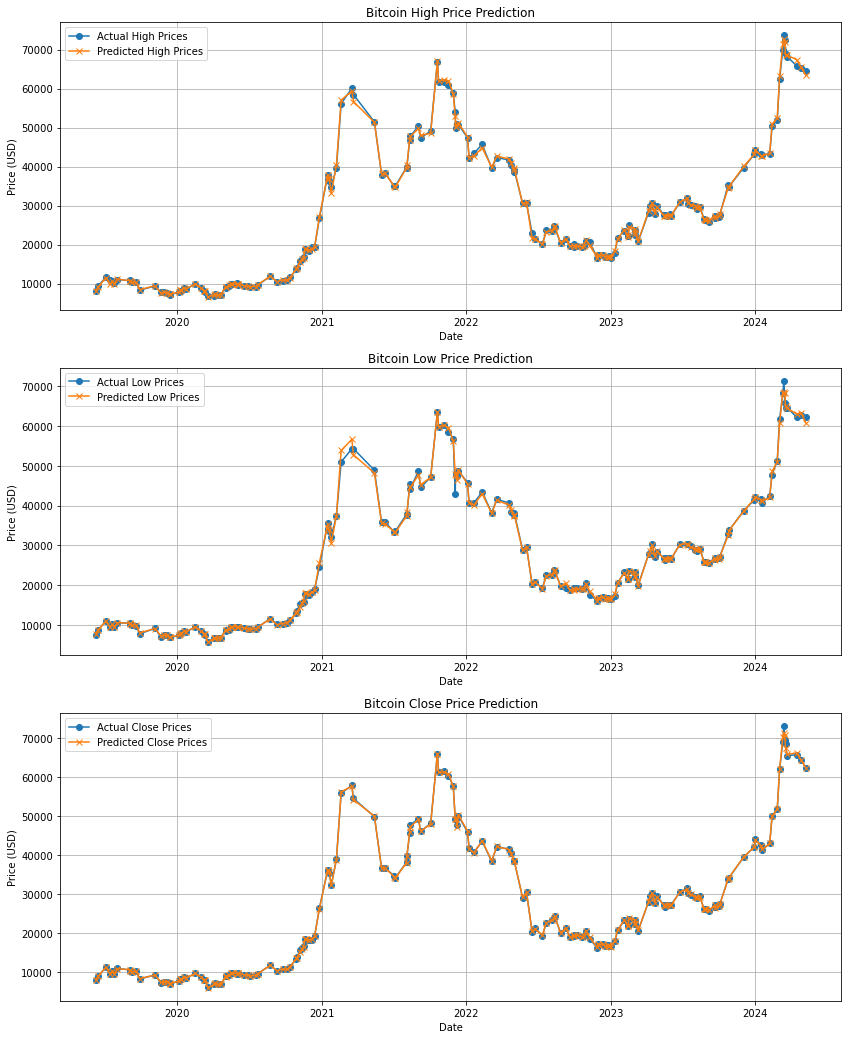

In [60]:
plt.figure(figsize=(14, 18))

plt.subplot(3, 1, 1)
plt.plot(results['Date'], results['Actual_High_Price'], label='Actual High Prices', marker='o')
plt.plot(results['Date'], results['Predicted_High_Price'], label='Predicted High Prices', marker='x')
plt.title('Bitcoin High Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(results['Date'], results['Actual_Low_Price'], label='Actual Low Prices', marker='o')
plt.plot(results['Date'], results['Predicted_Low_Price'], label='Predicted Low Prices', marker='x')
plt.title('Bitcoin Low Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(results['Date'], results['Actual_Close_Price'], label='Actual Close Prices', marker='o')
plt.plot(results['Date'], results['Predicted_Close_Price'], label='Predicted Close Prices', marker='x')
plt.title('Bitcoin Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

## Backtesting

In [61]:
def backtesting(input_date):
    date = input_date
    input_date = pd.to_datetime(input_date)
    
    subset = df[df['Date'].between(input_date, input_date + pd.Timedelta(days=7))]
    actual = subset[['BTC-High', 'BTC-Low', 'BTC-Close']][1:]
    subset = subset.drop(columns=['Date','BTC-High', 'BTC-Low', 'BTC-Close'])
    
    predictions = []
    for index, row in subset.iterrows():
        X_row = row.values.reshape(1,-1)
        prediction = rf_regressor.predict(X_row)
        prediction = np.append(prediction, input_date.strftime('%Y-%m-%d'))
        input_date += dt.timedelta(days=1)
        predictions.append(prediction)
    predictions = predictions[1:]
    
    results = pd.DataFrame({
        'Date': [arr[3] for arr in predictions],
        'Actual_High_Price': actual['BTC-High'],
        'Predicted_High_Price': [arr[0] for arr in predictions],
        'Actual_Low_Price': actual['BTC-Low'],
        'Predicted_Low_Price': [arr[1] for arr in predictions],
        'Actual_Close_Price': actual['BTC-Close'],
        'Predicted_Close_Price': [arr[2] for arr in predictions]
    })
    
    mse_high = mean_squared_error(results['Actual_High_Price'], results['Predicted_High_Price'], squared=False)
    mse_low = mean_squared_error(results['Actual_Low_Price'], results['Predicted_Low_Price'], squared=False)
    mse_close = mean_squared_error(results['Actual_Close_Price'], results['Predicted_Close_Price'], squared=False)
    
    mses = [date, mse_high, mse_low, mse_close]

    return mses
    

In [62]:
input_dates = ["4/21/2024", "4/28/2024", "5/05/2024"] # replace with 4/21, 4/28, and 5/5 once we have data
backtesting_mses = []
for i in input_dates:
    backtesting_mses.append(backtesting(i))
bt_df = pd.DataFrame(backtesting_mses, columns=['Week of: ', 'MSE for High Price Prediction', 'MSE for High Price Prediction', 'MSE for High Price Prediction'])

In [63]:
bt_df

,Week of:,MSE for High Price Prediction,MSE for High Price Prediction,MSE for High Price Prediction
0,4/21/2024,398.932183,378.226639,150.684520
1,4/28/2024,274.861367,500.709166,228.350794
2,5/05/2024,380.253729,612.754517,217.412270
